In [1]:
import numpy as np
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Se define la función para calcular la acción de un conjunto de puntos

In [2]:
def S(x,t=0.,m=0,xini=0.,xend=0.):
    t=float(t)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

Se define la función que minimiza la acción anterior en un intervalo de tiempo

In [3]:
def xfit(n,t=0,m=0,xini=0.,xend=0.,ftol=1E-8):
    t=float(t)
    if n%2==0:
        print ('x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size
    return x,xmax,Smin,Dt  

Se definen la gravedad y las variables de masa, número de puntos y tiempo, y con este último se establece implícitamente el valor de la altura máxima alcanzada en el movimiento

In [4]:
global g
g=9.8
m=0.2
t=4.5
n=17

Se calcula la mínima acción

In [5]:
y=xfit(n,t,m,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -72.645491
         Iterations: 31
         Function evaluations: 6322


Se determina el polinomio que describe el movimiento

In [6]:
t=np.linspace(0,4,n)
P=np.polyfit(t,y[0],deg=2)
pol=np.poly1d(P)
print(pol)

        2
-6.202 x + 24.81 x + 1.348e-07


Se grafica dicho polinomio y los puntos que lo describen

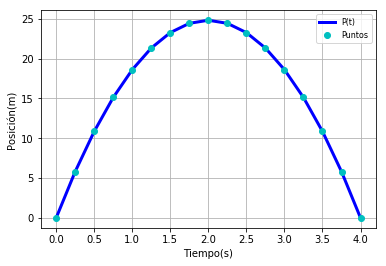

In [7]:
plt.plot(t,pol(t), color="blue", linewidth=3, label="P(t)")
plt.ylabel("Posición(m)")
plt.xlabel("Tiempo(s)")

plot(t,y[0],'co',label="Puntos")
plt.legend( loc="upper right", fontsize=8 )
plt.grid()